# Week 7: Digital Image Processing

## 1. Accessing and manipulating image pixels in python

Many major packages in python provide interfaces to manipulate images and videos. The most useful packages are numpy, scipy and scikit-image. All these packages provide the necessary functions and classes to work with signals, images, and develop some machine learning and AI techniques.

The first thing we have to do is load an image to a numpy array that holds all the required information to represent this image. We can represent an 8-bit grayscale image with a size of $H \times W$ pixels, as an array (matrix) $I$ that has size $H \times W$ ($H$ rows and $W$ columns). Each cell of the array $I$ holds a value from $0$ to $255$ which are all the possible values an 8-bit variable can take ($2^8=256$). A value of $0$ means that this pixel is black, and a value of 255 means that the pixel is white.

<img src="https://raw.githubusercontent.com/wOOL/COM2028/master/W1/pixelmap_gray.png" width="60%">

In this figure, we can see a pixelmap of a random grayscale image of size 10x10. The programming structure that holds this image in memory is an array of size 10x10. {Note that the pixel values are all in the range $[0,255]$ with 0 being black and 255 being white.}

<img src="https://raw.githubusercontent.com/wOOL/COM2028/master/W1/pixelmap_rgb.png" width="60%">

In this figure, we can see a pixelmap of a random RGB image of size 10x10. The programming structure that holds this image in memory is an array of size 10x10x3. Each one of the 3 dimensions are similar to the array that holds the data for a grayscale image. The first dimension holds the data regarding the red values of the image, the second of the green values, and the third the values related to the blue colour. There are other colour spaces that represent colours in different ways than the amount of red, green, blue that each pixel has (such as LUV, HSV, HSL etc.) but in this lab we will only use the RGB model. Using other models is straightforward if one knows how to work with RGB. {Each colour is produced by mixing specific weights of the three main components $r,g,b$.} 



The first exercise deals with the basics of how to load an image from a file to a numpy array. 

In [2]:
from skimage.io import imread

In [3]:
#read a grayscale image to a numpy array (a matrix)
gray = imread('https://raw.githubusercontent.com/ZhenhuaFengSurrey/COM2028/main/flower-grey.png')
print('gray shape => ', gray.shape) #outputs (256,256) but is same as (256,256, 1) as 256x256x1 elements

gray shape =>  (256, 256)


In [4]:
#read a colour image to a 3D numpy array (a tensor)
rgb = imread('https://raw.githubusercontent.com/ZhenhuaFengSurrey/COM2028/main/flower-rgb.png')
print('rgb shape =>', rgb.shape)

rgb shape => (256, 256, 3)


In [5]:
# print the first pixel values for both images
print('gray[0,0] => ' + str(gray[0,0])) #displays color intensity value for pixel [0,0]
print('rgb[0,0,:] => ' + str(rgb[0,0,:])) # : here is the same as [1,2,3]


gray[0,0] => 223
rgb[0,0,:] => [254 208 222]


The size (shape) of the gray flower image can also be written as (256,256,1), while the size of the colour RGB flower image is (256,256,3).

## 2. Converting from RGB to Grayscale

In this exercise we will see how to convert an image from RGB to grayscale, and we will also see how to run a function over all the pixels of an image, avoiding the usual $for$ loops and using some built-in numpy methods.

To convert an image from RGB to grayscale, we have to combine the information that are available in the three channels into a single channel. This is done by taking a combination of the three values (r, g, b) and producing a new value that represents the intensity. 

So in general the way to compute: 

\begin{equation}
Y = \alpha R + \beta G + \gamma B, \; with \; 0 \leq \alpha,\beta,\gamma \leq 1
\end{equation}

There are many combinations of values that give results that are consistent with the properties of human vision, and two commonly used triads[1] are \{$\alpha = 0.2125$, $\beta =0.7154$, $\gamma =0.0721$\} and \{$\alpha = 0.299$, $\beta =0.587$, $\gamma =0.114$\} {There is also the obvious choice of $\alpha =\beta =\gamma =\frac{1}{3}$ but this is not commonly used.}. 

Of course in order to convert the whole numpy array from an RGB array of size (256,256,3) to a grayscale array of size (256,256) we have to run the conversion formula through all the pixels of the image ($256\times256 = 65536$ conversions).

[1]. ITU-R, Parameter values for the hdtv standards for production and international programme exchange, http://www.itu.int/dms_pubrec/itu-r/rec/bt/R-REC-BT.709-3-199802-S!!PDF-E.pdf 


In [6]:
# numpy is a basic math package 
import numpy as np
# matplotlib allows to show and save plots and images.
import matplotlib.pyplot as plt

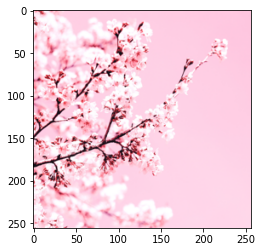

In [7]:
#plot the rgb image
plt.imshow(rgb)
plt.show()

In [9]:
# get the dimensions of the rgb image
(h,w,dims) = rgb.shape

# create an empty array of size (w,h)
grayscale = np.zeros((h,w))

In [10]:
# convert each pixel from rgb to greyscale
for x in range(h):
    for y in range(w):
        r = rgb[x,y,0]
        g = rgb[x,y,1]
        b = rgb[x,y,2]
        grayscale[x,y] = 0.2125*r + 0.7154*g + 0.0721*b

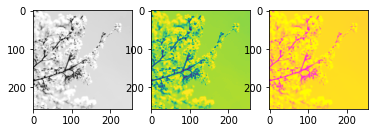

In [11]:
# show the gray image using two different colourmaps "gray", default and "spring"
# check this webpage for different colourmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.subplot(1,3,1)
plt.imshow(grayscale,cmap='gray')

plt.subplot(1,3,2)
plt.imshow(grayscale)

plt.subplot(1,3,3)
plt.imshow(grayscale,cmap='spring')

plt.show()

Python itself is not a fast language like C or C++. But the core modules of the numpy and scipy are written in C. That means that everything that involves pure nympy operations, should be more or less as fast as the equivalent compiled C code. Numpy provides many tools that can be used to eliminate the need for pure python code, and these tools should be used when someone writes a computationally expensive program. 

For example, the double $for$ (for each row,column) loop that computes the rgb->grayscale convertion in the above code can be avoided. To do this, we can use the advanced indexing tools of numpy.

We can perform many arithmetical and logical operations directly on the numpy objects. First we have to split the rgb array into its' three components r,g,b and then we can define a new array grayscale which is the same as the result of the double for loop in above code.

### <font color='red'>Task 1</font>
- Converting **RGB** pixels to **grayscale** pixels

In [12]:
R = rgb[:,:,0] # [:] means all the points in that direction, in this case zero gets the 1st value (0) in
                    #the 3rd dimension, the 2 colons does this for all 256x256 pixels in the image
G = rgb[:,:,1] #select green colors

# Your code here
B = rgb[:, :, 2]

#use of the above syntax is ~900 times faster than using pure python syntax
# You need to complete this line by adding G and B
gray = 0.2125 * R +  0.7154*G + 0.0721*B

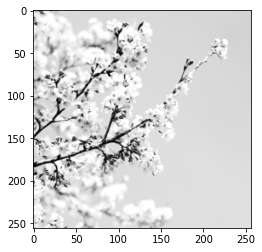

In [13]:
plt.imshow(gray,cmap="gray")
plt.show()

With this syntax, the execution time is around 900 times faster than the for loop version. Keep in mind that the R G B are full 2d arrays not scalar values. Is there an increase in speed from loops to indexing?


Indexing is a powerful way to avoid for loops, and it should be used whenever it is possible for fast code. {More about the numpy indexing together with some examples here: http://docs.scipy.org/doc/numpy/user/basics.indexing.html }


## 3. Manipulating images

### 3.1 Image flipping

By manipulating the raw pixels of the image we can perform some effects like image flipping. 

In [14]:
flower = gray.copy()

In [16]:
(h,w) = flower.shape
print(h,w)
print(flower.shape)

256 256
(256, 256)


In [17]:
#create an empty version of our image
flipped_vertical = np.zeros_like(flower)

In [22]:
#loop through the whole image and reverse x values
for y in range(h): # 0 to h-1
    for x in range(w): #0 to w-1
        flipped_vertical[h-y-1,x] = flower[y,x] #we add -1 because values are 0-255 but shape is 256

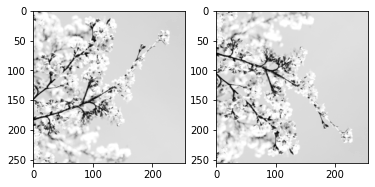

In [23]:
#show everything
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(flipped_vertical,cmap='gray')

plt.show()

By using the numpy advanced indexing. As in numpy A[0,0] means the element in the first row and the first column, and  x[:] means all the elements, x[::-1] means all the elements reversed. 

You can also use the time measuring snippets to compare the executing speed with the double for loop version (Check https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time for "%%timeit").

In [24]:
flipped_vertical_arr = flower[::-1,:]
#By using this we achieve the same end result as the code 2 boxes above
# [::-1, :] flips the values in the first dimension (with matrices(images) first dimension is y so we are flipping y values)

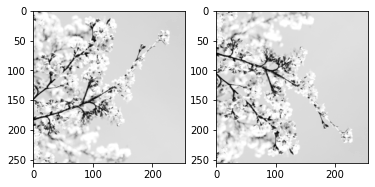

In [26]:
# Show everything
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(flipped_vertical_arr, cmap='gray')

plt.show()

### <font color='red'>Task 2</font>
Modify the above code so that it flips the image horizontally instead of vertically.

Hint: Please refer to what we did in flipping vertical

In [28]:
# Complete the code for task 2
#Remember images are formatted height x width rather than width x height
# to flip value horizontally we invert its x values (width values which are in 2nd index for this) so we flip the 2nd index in this case
flipped_horizontally_arr = flower[:, ::-1]


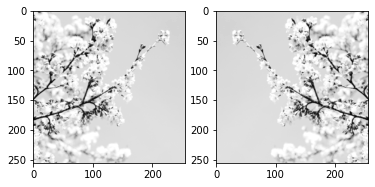

In [31]:
# Show everything

# Show everything
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(flipped_horizontally_arr, cmap='gray')

plt.show()

### <font color='red'>Task 3</font>
If $x$ is the value of any pixel in (0, 255), the inverse can be computed using the function $f(x) = 255 - x$. Modify the code so that it shows the inverse of an image.

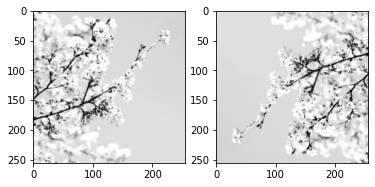

In [32]:
# Complete the code for task 3 and show your images
#the inversion of an image involves flipping both its y (height) and x (width) values

inverse = flower[::-1, ::-1]

#show original
plt.subplot(1,2,1) #1 row, 2 column and then 1st index in that row 
plt.imshow(gray, cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(inverse, cmap = 'gray')
plt.show()



### 3.2 Image contrast

We can adjust the contrast of the image, if we multiple each pixel with a value $a$, that we will call $adjustment\; factor$. intuitively, if $a>1$ then we will enhance the image contrast, and if $a<1$ then we will reduce the image contrast. 

One technical problem that we will find this time, is the overflow. When we manipulate 8-bit images, some times our calculations make the pixels get values higher than 255 and lower than 0. For uint8 grayscale images, this will produce an overflow. There are many solutions, but the simplest one is the following:


* Load the image as a float array instead of uint8
* Perform the manipulations
* Convert the values that are above 255 to 255
* Convert the values that are below 0 to 0
* Present the image as a uint8 array

Also in this example, we will learn how to present multiple plots in the same figure using matplotlib's subplot functions.



In [58]:
# create the new empty versions of our original image
# note that the values of both are all 0s
darkened = np.zeros_like(flower)
lightened = np.zeros_like(flower)

In [59]:
# set the value for a
a_darken = 0.3
a_lighten = 1.5

In [63]:
# Your code here: obtain the images for both cases

#need to load the images
#we can use the below syntax to make deep copies of the original greyscale image (gray)

#darkened = gray.copy()
#lightened = gray.copy()

#but we will use numpy syntax on flower instead
darkened = flower[:, :]
lightened = flower[:, :]

darkened = np.multiply(darkened, a_darken)
lightened = np.multiply(lightened, a_lighten)







In [65]:
# fix the overflows
darkened[darkened>255]=255
darkened[darkened<0]=0
lightened[lightened>255]=255
lightened[lightened<0]=0

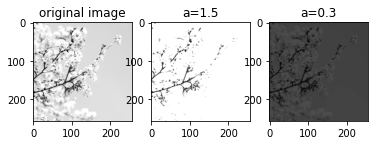

In [66]:
fig = plt.figure()

# we add vmin and vmax here to avoid automatic scaling of pixel values when displaying the image. 
# Try this again by removing the vmin and vmax arguments

plt.subplot(1,3,1)
plt.imshow(flower, cmap = 'gray', vmin=0, vmax=255) 
plt.title('original image')

plt.subplot(1,3,2)
plt.imshow(lightened.astype("uint8"), cmap = 'gray', vmin=0, vmax=255) 
plt.title('a='+str(a_lighten))

plt.subplot(1,3,3)
plt.imshow(darkened.astype("uint8"), cmap = 'gray', vmin=0, vmax=255) 
plt.title('a='+str(a_darken))

plt.show()

The following codes are the ones that perform the overflow protection. Remove them to see what the result is without overflow handling, and try to interpret it.

```python
darkened[darkened>255]=255
darkened[darkened<0]=0
lightened[lightened>255]=255
lightened[lightened<0]=0
```


### 3.3 Averaging images

To blend images together, we just have to create a new image, where each element is the mean value of the respective elements in the two input images. 

In general, to create a new image $A$, that is a blend of the images $I_1,I_2,I_3,...,I_n$, 

\begin{equation}
A = \sum_{k=1}^{n} w_k \times I_k  \; \textbf{(element-wise)}
\end{equation}

The weights $w_k$ define the amount of contribution of each image in the final averaged image, and the sum of all the weifht should add up to 1.

To demonstrate the averaging of images, we will use the Olivetti dataset which contains 400 face images. We are going to compute how the average face looks like.

In [67]:
# this is a face image data set https://mclguide.readthedocs.io/en/latest/sklearn/image.html
from sklearn.datasets import fetch_olivetti_faces

In [68]:
# load the dataset with the faces
dataset = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\liamd\scikit_learn_data


In [74]:
faces = dataset.data
image_shape = ((64,64)) #the faces are 64x64
print(faces.shape)
#faces has original shape of 4086, we can convert this to a 64x64 structure
#there are 400 face samples in total

(400, 4096)


In [71]:
n_samples, n_features = faces.shape
new = faces.reshape((400,1,64*64)) #create a 'new' variable that structures the 400 face samples appropriately

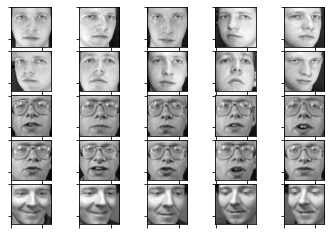

In [72]:
#show the 25 first faces
plt.subplots_adjust(wspace=0.1, hspace=0.1)
for x in range(0, 25):
    image = new[x].reshape((image_shape))
    ax = plt.subplot(5,5,x+1)
    plt.imshow(new[x].reshape((image_shape)), cmap="gray")
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

plt.show()

In [75]:
#main loop for averaging some faces in the dataset, e.g., the first 50 faces
#the toal number of faces in this dataset is 400

number_of_faces_to_average = 50

#to get the average wee need to loop over the images,
#sum them up and then divide by the number of elements
average_face = np.zeros(image_shape, dtype=np.float32)

for x in range(number_of_faces_to_average):
    #add to the average
    average_face = np.add(average_face,faces[x].reshape(image_shape))

average_face = np.divide(average_face,number_of_faces_to_average)

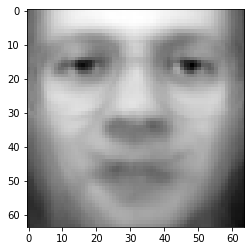

In [76]:
# show the average face
fig = plt.figure()
plt.imshow(average_face, cmap="gray")
plt.show()

### <font color='red'>Task 4</font>
Change the value of the variable **number_of_faces_to_average** to see how it affects the average face image.

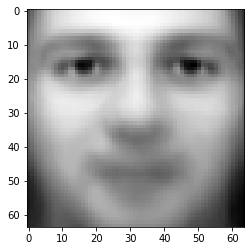

In [81]:
# Complete the code for task 4
#main loop for averaging some faces in the dataset, e.g., the first 50 faces
#the toal number of faces in this dataset is 400

number_of_faces_to_average = 200

#to get the average wee need to loop over the images,
#sum them up and then divide by the number of elements
average_face = np.zeros(image_shape, dtype=np.float32)

for x in range(number_of_faces_to_average):
    #add to the average
    average_face = np.add(average_face,faces[x].reshape(image_shape))

average_face = np.divide(average_face,number_of_faces_to_average)

# show the average face
fig = plt.figure()
plt.imshow(average_face, cmap="gray")
plt.show()

##THE MORE FACES WE ADD TO THE AVERAGE THE MORE BLURRED/UNRECOGNISABLE THE FEATURES TEND TO BECOME AS IT JUST BECOMES A MESS OF DIFFERENT VALUES


### 3.4 Histogram based methods

Histogram is an array that shows the distribution of the pixel values for an image. For an 8-bit grayscale images, there are $2^8=256$ possible different values for each pixel. The histogram of such an image, will consist of an 1D array h of size 256, where h[i]=x means that there are exactly x pixels in the image that take the value i. 


In [ ]:
hist = np.zeros(256)

for (x,y),value in np.ndenumerate(flower.astype(np.uint8)):
    hist[int(value)] += 1

In [ ]:
fig = plt.figure()

plt.subplot(121, aspect='equal')
plt.imshow(flower.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title('Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.plot(hist)
plt.title('Histogram')
plt.show()

Plot the 3-component histogram for the colour image flower. You can create three new grayscale images from the 3 planes of the colour image (r,g,b) and then plot a histogram for each one of them. (Note: You can use fuction 'np.histogram(r.flatten(),256)' to get each component histogram for the colour image flower)


In [ ]:
#load the rgb version of image
flower = rgb.copy()

In [ ]:
r = flower[:,:,0];
g = flower[:,:,1];
b = flower[:,:,2];


#show the images
fig = plt.figure(0)
plt.subplots_adjust(hspace = 1)	
plt.subplot(431, aspect='equal')
plt.imshow(r.astype(np.uint8), cmap='gray')
plt.title('r')
plt.xticks([])
plt.yticks([])

#show the images
fig = plt.figure(0)
plt.subplot(432, aspect='equal')
plt.imshow(g.astype(np.uint8), cmap='gray')
plt.title('g')
plt.xticks([])
plt.yticks([])

#show the images
fig = plt.figure(0)
plt.subplot(433, aspect='equal')
plt.imshow(b.astype(np.uint8), cmap='gray')
plt.title('b')
plt.xticks([])
plt.yticks([])


plt.subplot(512)
plt.xlim([0,255])
plt.hist(r.flatten(),bins=256,color='r')
plt.title('r histogram')


plt.subplot(513)
plt.xlim([0,255])
plt.hist(g.flatten(),bins=256,color='g')
plt.title('g histogram')

plt.subplot(514)
plt.xlim([0,255])
plt.hist(b.flatten(),bins=256,color='b')
plt.title('b histogram')

plt.show()

Plot and compare the histogram for the original, flipped and inversed flower images. 

In [ ]:
flower = gray.copy()

hist = np.zeros(256)
hist_flipped = np.zeros(256)
hist_inverse = np.zeros(256)

for (x,y),value in np.ndenumerate(flower.astype(np.uint8)):
    hist[int(value)] = hist[int(value)]+1   

for (x,y),value in np.ndenumerate(flipped_vertical_arr.astype(np.uint8)):
    hist_flipped[int(value)] = hist_flipped[int(value)]+1    

for (x,y),value in np.ndenumerate(inverse.astype(np.uint8)):
    hist_inverse[int(value)] = hist_inverse[int(value)]+1 
    
    
#show the images
fig = plt.figure(0)
plt.subplot(141)
plt.imshow(flower.astype(np.uint8), cmap="gray")
plt.title('Orignal flower')
plt.xticks([])
plt.yticks([])


plt.subplot(142)
plt.xlim([0,255])
plt.plot(hist)
plt.title('Orignal flower  histogram')

#show the images
plt.subplot(143)
plt.xlim([0,255])
plt.plot(hist_flipped)
plt.title('flipped flower histogram')

#show the images
plt.subplot(144)
plt.xlim([0,255])
plt.plot(hist_inverse)
plt.title('inverse flower histogram')



plt.show()

### 3.5 Histogram equalization

Histogram is a powerful tool because it gives us the general view of the image, and we can use it in order to utilize several transformations on that image. Here we will see how we can use it to make an image with low contrast reveal the information it hides. 

<img src="https://raw.githubusercontent.com/wOOL/COM2028/master/W1/moon_original.png" width="50%">

In this figure, we can see a standard test image for histogram based algorithms, the moon image. The poor contrast makes it difficult to get the details of the image. 

In order to understand the method that is used to improve the quality of this image, we need to be familiar with another thing except the histogram: the cumulative distribution function. The cumulative histogram, supposing the we already have computed the histogram $hist$ can be defined as:

\begin{equation}
c\_hist(x) = \displaystyle\sum\limits_{i=1}^x hist(i)
\end{equation}

This new array F holds information that shows how many pixels in the image have values equal or less to a specific value x. So if we want to find out how many pixels in our image have value less than 200, we need to find the value of $c\_hist(200)$. 

However we can use the information from the cumulative histogram, to make the histogram more spread along the $256$ different values that it can take. First of all, we can to normalise the values of the $c\_hist$ so that they are between $[0,255]$. This can be simply done by 

\begin{equation}
c\_hist_{normalised}(x) = \frac{256 \times c\_hist(x)}{max(c\_hist)}
\end{equation}

If we only keep the integer part for the normalized values, then the values of the $c\_hist_{normalised}(x)$ will be from $[0,255]$. This allows as to use them as a mapping function. So the algorithm that we will use for histogram equalization is just to remap each pixel of the image, to a new value based on the information that $c\_hist_{normalised}(x)$ holds. For example if the $c\_hist_{normalised}(100) = 150$, this means that all the pixels in the original image that have value of 100, should now take the value of 150. 

In [ ]:
from skimage.data import moon
plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
#load the moon image: it is a low contrast image
moon = moon()
imhist, _ = np.histogram(moon.flatten(), 256)
#compute the cumulative distribution
cdf = imhist.cumsum()

In [ ]:
#create the pixel equalization transform 
cdf = 255 * cdf / cdf[255] 

In [ ]:
#create a new image to hold the equalized
moon_equalized = np.empty_like(moon)
for (x,y), pixel_value in np.ndenumerate(moon):
    moon_equalized[x,y] = cdf[pixel_value]
    
#get the info for the equalized image
imhist_eq, _ = np.histogram(moon_equalized.flatten(),256)
cdf_eq = imhist_eq.cumsum() 

In [ ]:
#plot the images
plt.figure(0)

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(moon.astype(np.uint8), cmap="gray",vmin=0,vmax=255)

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.imshow(moon_equalized.astype(np.uint8), cmap="gray",vmin=0,vmax=255)

#plot the info
plt.figure(1)
plt.subplots_adjust(wspace=1, hspace=1)
x = np.arange(0,256)

plt.subplot(4,1,1)
plt.title('The PDF of the equalized moon image (histogram)')
plt.xlim([0,255])
plt.bar(x,imhist)

plt.subplot(4,1,2)
plt.plot(cdf)
plt.title('The CDF of the equalized moon image')
plt.xlim([0,255])

plt.subplot(4,1,3)
plt.title('The PDF of the equalized moon image (histogram)')
plt.xlim([0,255])
plt.plot(imhist_eq)

plt.subplot(4,1,4)
plt.plot(cdf_eq)
plt.title('The CDF of the equalized moon image')
plt.xlim([0,255])

plt.show()

### 3.6 Convolution based methods

The discrete convolution that we will use in this lab is a process of using with a kernel $K$ of size $n\times n$, on an image $I$ of size $m\times l$ that returns an new image $C$. To compute the value of this new image in the pixel $x,y$ we use the following equation:

\begin{equation}
C(x,y) = \sum\limits_{q=-w}^{w} \sum\limits_{p=-w}^{w} I(x-q,y-p) \cdot K(q,p)
\label{equation:convolution}
\end{equation}

where $w=(n-1)/2$.
The example below clarifies the process of the convolution, using a sample image $I$ and a mask $K$.

\begin{equation} 
I=
\begin{pmatrix}
10 & 20 & 25 & \cdots & \cdots \\
11 & \underline{22} & 33 & \cdots & \cdots \\
44 & 50 & 90 & \cdots & \cdots\\
\cdots & \cdots & \cdots & \cdots & \cdots\\
\cdots & \cdots & \cdots & \cdots & \cdots\\
\end{pmatrix}
\end{equation} 


\begin{equation} 
K= \frac{1}{9} \cdot
\begin{pmatrix}
1 & 2 & 1 \\
0 & 1 & 0 \\
1 & 2 & 1
\end{pmatrix}
\end{equation} 


We want to apply the convolution mask to the pixel which is underlined, with value 22. According to the equation, the new value of this pixel will be:


\begin{equation} 
\frac{1}{9} \{ 1 \cdot 10 + 2 \cdot 20 + 1 \cdot 25 + 0 \cdot 11+ 1 \cdot 22+ 0 \cdot 33+ 1 \cdot 44+ 2 \cdot 50 + 1 \cdot 90 \}= 36
\end{equation} 

So in the new convoluted image that we will call $C$, the element in the same position as the anchor point in the original image (the squared 22), will become 36.

\begin{equation} 
C=
\begin{pmatrix}
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \underline{36} & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots\\
\cdots & \cdots & \cdots & \cdots & \cdots\\
\cdots & \cdots & \cdots & \cdots & \cdots\\
\end{pmatrix}
\end{equation} 

That means that for an image of size [128,128] and a kernel of size [3,3] to get the convolved image we need to perform $126 \times 126 \times 9$ operations (without padding).


In the following code program, you will find a simple implementation of a convolution. The flower image, is convoluted with the kernel $K$. 


In [ ]:
flower = gray.copy()
(w,h) = flower.shape

In [ ]:
norm_factor = 1.0/21.0 
kernel = norm_factor * np.array([[1, 3, 1],
                   [3, 5, 3], 
                   [1, 3, 1]])  

convoluted = np.empty_like(flower)

In [ ]:
#slow unoptimzed code
for x in range(1,w-1):
    for y in range(1,h-1):
        convoluted[x,y] = kernel[0,0]* flower[x-1,y-1] + kernel[0,1]* flower[x-1,y] \
        + kernel[0,2]* flower[x-1,y+1] + kernel[1,0]* flower[x,y-1] + kernel[1,1]* flower[x,y] \
        + kernel[1,2]* flower[x,y+1] + kernel[2,0]* flower[x+1,y-1] + kernel[2,1]* flower[x+1,y]\
        + kernel[2,2]* flower[x+1,y+1]

In [ ]:
#fix the overflows
convoluted[convoluted>255]=255
convoluted[convoluted<0]=0

In [ ]:
#plot the images
plt.figure(0)

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(gray.astype(np.uint8), cmap="gray", vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.imshow(convoluted.astype(np.uint8), cmap="gray", vmin=0, vmax=255)

plt.show()

### The following code apply Kernel to color image


In [ ]:
flower = rgb.copy().astype(np.float32)
(w,h,d) = flower.shape

In [ ]:
norm_factor = 1.0
kernel = norm_factor * np.array([[1, 2, 1],
                   [0, 0, 0], 
                   [-1, -2, -1]]) 
convoluted = np.empty_like(flower)


In [ ]:
#slow unoptimzed code
for x in range(1,w-1):
    for y in range(1,h-1):
        convoluted[x,y] = kernel[0,0]* flower[x-1,y-1] \
         + kernel[0,1]* flower[x-1,y] \
         + kernel[0,2]* flower[x-1,y+1] \
         + kernel[1,0]* flower[x,y-1] \
         + kernel[1,1]* flower[x,y] \
         + kernel[1,2]* flower[x,y+1] \
         + kernel[2,0]* flower[x+1,y-1] \
         + kernel[2,1]* flower[x+1,y] \
         + kernel[2,2]* flower[x+1,y+1]

In [ ]:
# #fix the overflows
convoluted[convoluted>255]=255
convoluted[convoluted<0]=0

In [ ]:
#plot the images
plt.figure(0)
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(flower.astype(np.uint8),cmap='gray',vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.imshow(convoluted.astype(np.uint8), cmap='gray',vmin=0, vmax=255)
plt.show()

### Try it yourself
Run the code in the colour flower image, using the kernels below. You can also experiment with your own kernels, by putting in random numbers and seeing the results.

Below are some important kernels.

\begin{equation} 
motion= \frac{1}{3} \cdot
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
\end{equation} 
\begin{equation} 
sharpen=
\begin{pmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{pmatrix}
\end{equation} 

\begin{equation} 
laplacian=
\begin{pmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{pmatrix}
\end{equation} 

\begin{equation} 
emboss =
\begin{pmatrix}
-2 & -1 & 0 \\
-1 & 0 & 1 \\
0 & 1 & 2
\end{pmatrix}
\end{equation} 

\begin{equation} 
edge= \frac{1}{8} \cdot
\begin{pmatrix}
1 & 2 & 1 \\
0 & 1 & 0 \\
1 & 2 & 1
\end{pmatrix}
\end{equation} 
\begin{equation} 
gaussian=\frac{1}{21} \cdot
\begin{pmatrix}
1 & 3 & 1 \\
3 & 5 & 3 \\
1 & 3 & 1
\end{pmatrix}
\end{equation} 


In [ ]:
# Try the code for different kernel



# Optional challenge Part: median house price prediction

**Example scenario:** You are a Californian estate agent trying to identify the best suburbs and houses for median sale price, so you can actively focus on these high-value areas and properties... Especially since your commission is based on sale price.

**Task:** Create a estimator using a method of your choice (e.g. MLP, Linear Regression) to estimate median house price. You need to use a 5-fold cross-validation method for the evaluation of your model's performance. The concept of cross-validation was introduced in Week 4. You can also refer to https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Notes:
- You may use any subset or all the features provided when training your model.
- You may not need or want all features, and your model will train faster with a subset of the data.
- You may want to use feature-wise normalisation of the dataset.

Download the dataset from SurreyLearn and upload it to your GoogleColab file folder.

Then we can load and process the data.

In [ ]:
import pandas as pd
all_house_data = pd.read_csv('California_Houses.csv')

print(f'The first 10 samples (target=Median_House_Value): \n{all_house_data[:10]}\n\n')

# You may want to change which columns are used for a more efficient or better model...
# Some features may not correlate well with our target...
# You may also want to try feature-wise normalisation (e.g. sklearn.preprocessing.normalize, axis=0), which may help your model.
columns = ['Median_Income',
           'Median_Age',
           'Tot_Rooms',
           'Tot_Bedrooms',
           'Population',
           'Households',
           'Latitude',
           'Longitude',
           'Distance_to_coast',
           'Distance_to_LA',
           'Distance_to_SanDiego',
           'Distance_to_SanJose',
           'Distance_to_SanFrancisco']

# Add your code below to train and test your model using a 5-fold cross-validation evaluation method




## End of the notebook.